In [9]:
"""
You’re now stepping into one of Python’s most powerful skill areas: data analysis and visualization.
Welcome to Lesson 11: Data Analysis with pandas and matplotlib — this is where Python begins to show its real-world impact, especially in health data, research, and analytics.
Learning Goals
By the end of this lesson, you’ll be able to:
Use pandas to create, clean, and explore datasets
Summarize and analyze health data using core functions
Visualize data using matplotlib (and briefly, seaborn)
Combine your analytical and visualization skills in a mini health dashboard

Introducing pandas
pandas is the data analysis powerhouse of Python.
It provides two key structures:

| Structure     | Description                   | Analogy           |
| ------------- | ----------------------------- | ----------------- |
| **Series**    | One-dimensional labeled array | A column in Excel |
| **DataFrame** | Two-dimensional labeled table | A spreadsheet     |

Create a DataFrame from a dictionary
"""
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [52, 47, 63],
    "BP_Systolic": [120, 138, 145],
    "BP_Diastolic": [78, 85, 90]
}

df = pd.DataFrame(data)
print(df)


      Name  Age  BP_Systolic  BP_Diastolic
0    Alice   52          120            78
1      Bob   47          138            85
2  Charlie   63          145            90


In [10]:
# Exploring Data

print(df.head())       # first 5 rows
print(df.info())       # data types and non-null count
print(df.describe())   # numeric summary
print(df.columns)      # column names
print(df.shape)        # (rows, columns)


      Name  Age  BP_Systolic  BP_Diastolic
0    Alice   52          120            78
1      Bob   47          138            85
2  Charlie   63          145            90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          3 non-null      object
 1   Age           3 non-null      int64 
 2   BP_Systolic   3 non-null      int64 
 3   BP_Diastolic  3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes
None
             Age  BP_Systolic  BP_Diastolic
count   3.000000     3.000000      3.000000
mean   54.000000   134.333333     84.333333
std     8.185353    12.897028      6.027714
min    47.000000   120.000000     78.000000
25%    49.500000   129.000000     81.500000
50%    52.000000   138.000000     85.000000
75%    57.500000   141.500000     87.500000
max    63.000000   145.000000     90.000000
Index(['Name', 'Age'

In [11]:
# Accessing Columns and Rows

print(df["Name"])        # get one column
print(df[["Name", "Age"]])  # multiple columns
print(df.iloc[0])        # first row (by index)
print(df.loc[2, "Name"]) # access by label


0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
      Name  Age
0    Alice   52
1      Bob   47
2  Charlie   63
Name            Alice
Age                52
BP_Systolic       120
BP_Diastolic       78
Name: 0, dtype: object
Charlie


In [4]:
# Adding, Editing, and Removing Columns

df["BP_Category"] = ["Normal", "Stage 1", "Stage 2"]
df["Pulse"] = [72, 88, 94]

# Update a value
df.loc[1, "Age"] = 48

# Drop a column
df = df.drop(columns=["Pulse"])
print(df)


      Name  Age  BP_Systolic  BP_Diastolic BP_Category
0    Alice   52          120            78      Normal
1      Bob   48          138            85     Stage 1
2  Charlie   63          145            90     Stage 2


In [12]:
# Filtering and Conditional Logic
# Filter patients with systolic BP ≥ 140:

high_bp = df[df["BP_Systolic"] >= 140]
print(high_bp)


      Name  Age  BP_Systolic  BP_Diastolic
2  Charlie   63          145            90


In [6]:
# You can also combine conditions:

high_risk = df[(df["BP_Systolic"] >= 140) & (df["Age"] > 60)]
print(high_risk)


      Name  Age  BP_Systolic  BP_Diastolic BP_Category
2  Charlie   63          145            90     Stage 2


In [13]:
# Aggregation and Grouping
# Let’s add a new column for risk level:

df["Risk"] = ["Low", "Medium", "High"]


In [14]:
# Now analyze averages:

print(df.groupby("Risk")["BP_Systolic"].mean())


Risk
High      145.0
Low       120.0
Medium    138.0
Name: BP_Systolic, dtype: float64


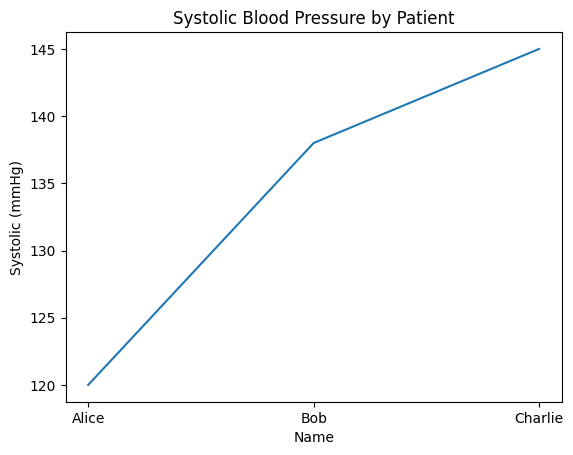

In [15]:
# Introduction to matplotlib
# matplotlib is the foundation of python visualization

import matplotlib.pyplot as plt

plt.plot(df["Name"], df["BP_Systolic"])
plt.title("Systolic Blood Pressure by Patient")
plt.xlabel("Name")
plt.ylabel("Systolic (mmHg)")
plt.show()


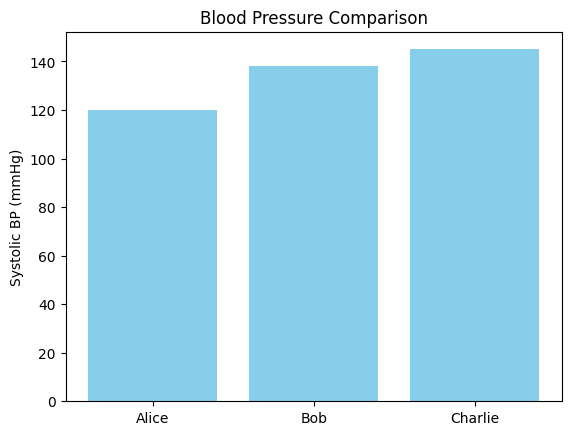

In [16]:
# Bar Chart example

plt.bar(df["Name"], df["BP_Systolic"], color="skyblue")
plt.title("Blood Pressure Comparison")
plt.ylabel("Systolic BP (mmHg)")
plt.show()


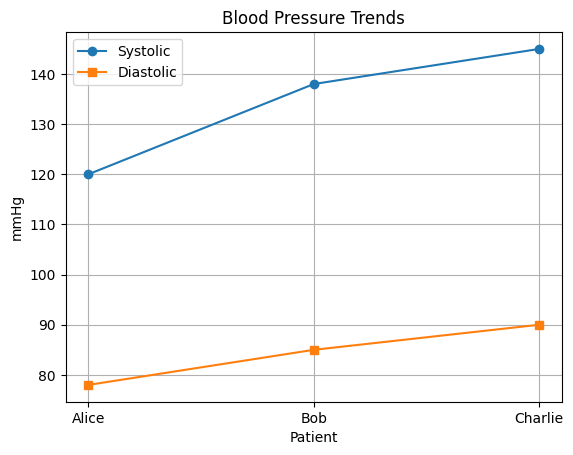

In [17]:
# Multiple Lines (Compare Systolic vs. Diastolic)

plt.plot(df["Name"], df["BP_Systolic"], label="Systolic", marker="o")
plt.plot(df["Name"], df["BP_Diastolic"], label="Diastolic", marker="s")
plt.title("Blood Pressure Trends")
plt.xlabel("Patient")
plt.ylabel("mmHg")
plt.legend()
plt.grid(True)
plt.show()


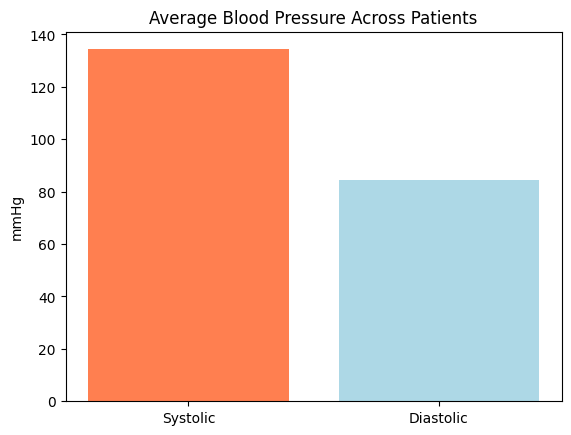

In [18]:
# Summary Statistics and Visualization Combined
# Let's calculate mean BP and visualize:

mean_sys = df["BP_Systolic"].mean()
mean_dia = df["BP_Diastolic"].mean()

plt.bar(["Systolic", "Diastolic"], [mean_sys, mean_dia], color=["coral", "lightblue"])
plt.title("Average Blood Pressure Across Patients")
plt.ylabel("mmHg")
plt.show()


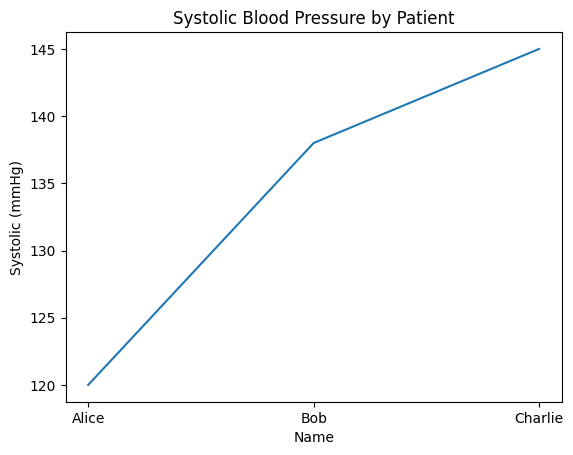

In [19]:
import matplotlib.pyplot as plt

plt.plot(df["Name"], df["BP_Systolic"])
plt.title("Systolic Blood Pressure by Patient")
plt.xlabel("Name")
plt.ylabel("Systolic (mmHg)")
plt.show()


/var/folders/td/qbcj0hqn549b0ymvdm8q658h0000gn/T/ipykernel_14726/2532876568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Name", y="BP_Systolic", data=df, palette="coolwarm")


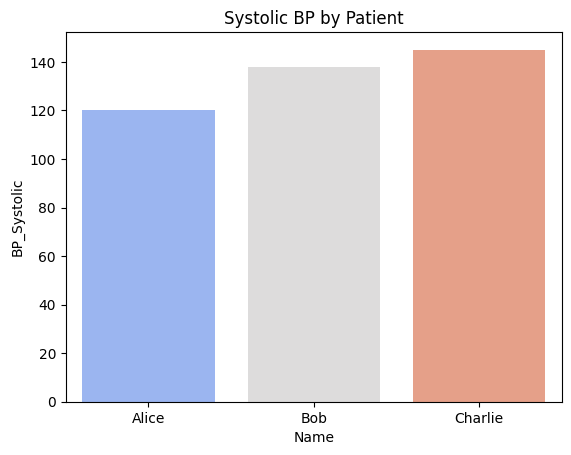

In [7]:
# Quick Visualization with seaborn 
# seaborn adds cleaner, more modern visuals

import seaborn as sns

sns.barplot(x="Name", y="BP_Systolic", data=df, palette="coolwarm")
plt.title("Systolic BP by Patient")
plt.show()


Average steps: 9340.0


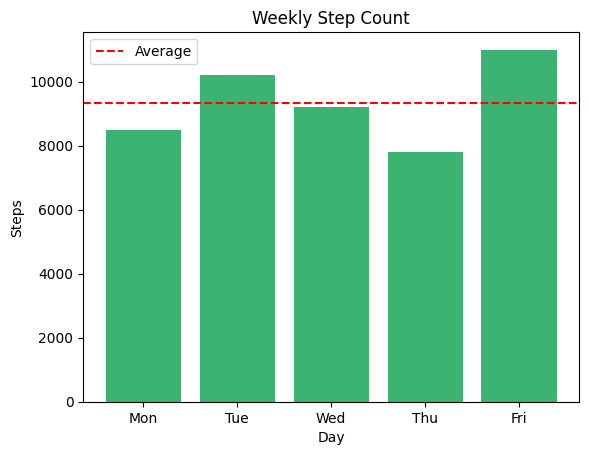

In [20]:
# Mini Project: Daily Step Tracker

import pandas as pd
import matplotlib.pyplot as plt

# Step data
steps = {
    "Day": ["Mon", "Tue", "Wed", "Thu", "Fri"],
    "Steps": [8500, 10200, 9200, 7800, 11000]
}

df = pd.DataFrame(steps)

# Stats
print("Average steps:", df["Steps"].mean())

# Visualization
plt.bar(df["Day"], df["Steps"], color="mediumseagreen")
plt.axhline(df["Steps"].mean(), color="red", linestyle="--", label="Average")
plt.title("Weekly Step Count")
plt.xlabel("Day")
plt.ylabel("Steps")
plt.legend()
plt.show()

"""
| Task                  | Library    | Example                                   |
| --------------------- | ---------- | ----------------------------------------- |
| Load and explore data | pandas     | `pd.read_csv("file.csv")`                 |
| Filter and analyze    | pandas     | `df[df["Age"] > 50]`                      |
| Visualize trends      | matplotlib | `plt.plot(df["Name"], df["BP_Systolic"])` |
| Summarize             | pandas     | `df.describe()`                           |
| Modern visuals        | seaborn    | `sns.barplot(...)`                        |

"""